In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import scipy as sp
from scipy.io import readsav

In [2]:
dat=readsav('S12_ENCELADUS_VIMS_cubeconvert/CM_1500061406_1.sav')
qub=dat.qub
wavel=dat.wavel
dat=readsav('S12_ENCELADUS_VIMS_cubeconvert/CM_1500061545_1.sav')
qubx=dat.qub
wavel=dat.wavel

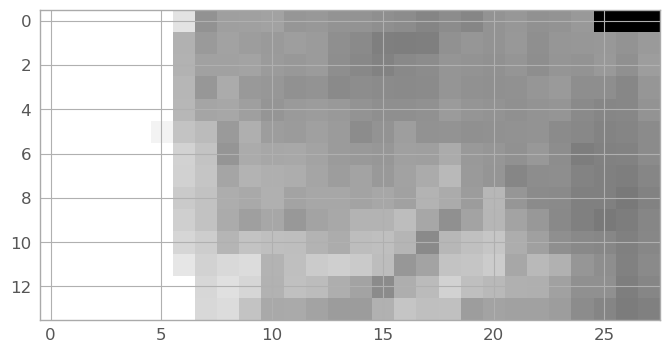

/opt/anaconda3/lib/python3.13/site-packages/matplotlib/colors.py:777: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


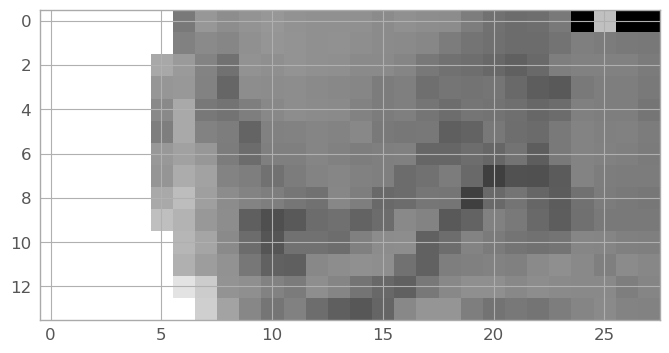

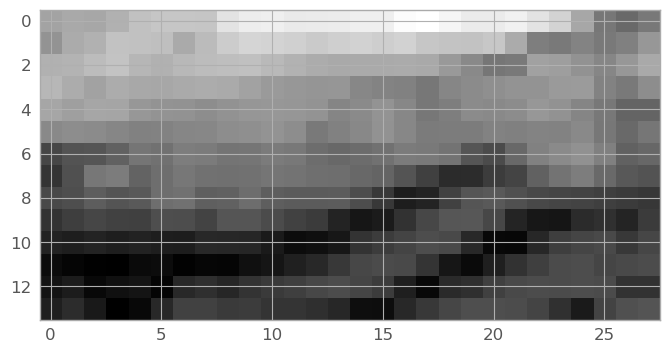

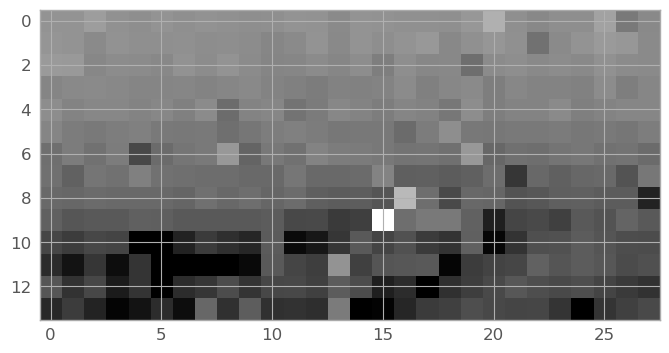

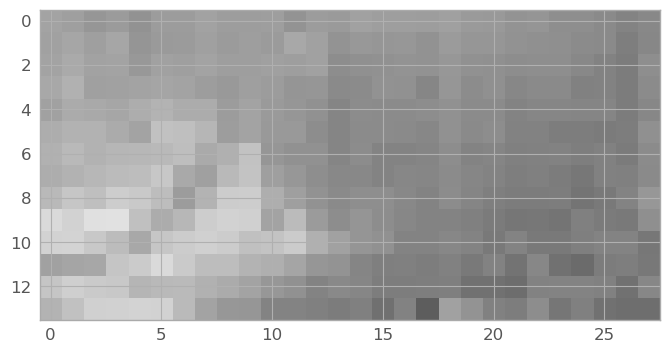

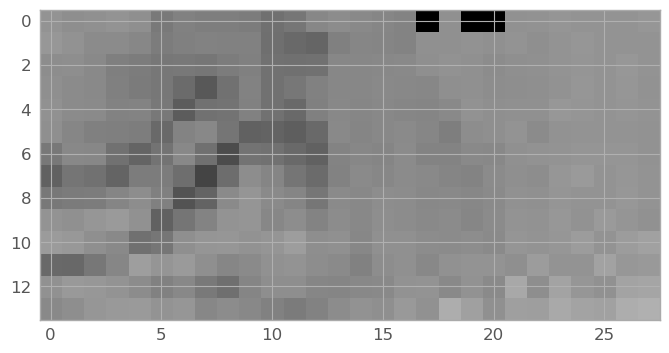

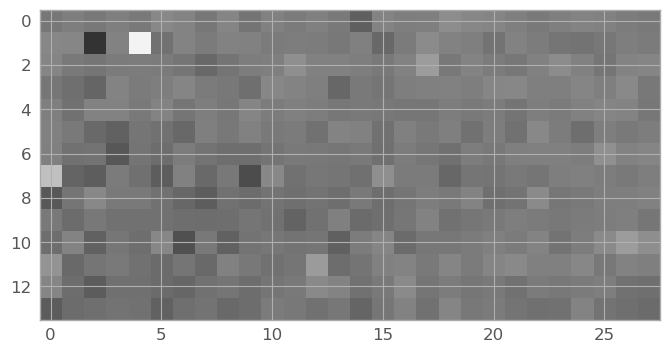

In [3]:
foo1=(wavel<0.4)
foo2=(wavel>0.57) & (wavel<0.62)
foo3=(wavel>0.85) & (wavel<0.90)
im1=np.mean(qub[:,foo1,:], axis=1)
im2=np.mean(qub[:,foo2,:], axis=1)
im3=np.mean(qub[:,foo3,:], axis=1)
imx=np.zeros([14,28,3])
imx[:,:,0]=im3
imx[:,:,1]=im2
imx[:,:,2]=im1

im1x=np.mean(qubx[:,foo1,:], axis=1)
im2x=np.mean(qubx[:,foo2,:], axis=1)
im3x=np.mean(qubx[:,foo3,:], axis=1)
imxx=np.zeros([14,28,3])
imxx[:,:,0]=im3x
imxx[:,:,1]=im2x
imxx[:,:,2]=im1x

fooi1=(wavel>3.52) & (wavel<3.57)
fooi2=(wavel>3.58) & (wavel<3.62)
im1i=np.mean(qub[:,fooi1,:], axis=1)
im2i=np.mean(qub[:,fooi2,:], axis=1)
im1ix=np.mean(qubx[:,fooi1,:], axis=1)
im2ix=np.mean(qubx[:,fooi2,:], axis=1)



plt.imshow(im1/im2, vmin=0.9, vmax=1.1, cmap='gray')
plt.show()
plt.imshow(im3/im2, vmin=0.7, vmax=1.1, cmap='gray')
plt.show()
plt.imshow(qub[:,200,:], cmap='gray')
plt.show()
plt.imshow(im1i/im2i, vmin=0.8, vmax=1.2, cmap='gray')
plt.show()

plt.imshow(im1x/im2x, vmin=0.9, vmax=1.1, cmap='gray')
plt.show()
plt.imshow(im3x/im2x, vmin=0.7, vmax=1.1, cmap='gray')
plt.show()
plt.imshow(im1ix/im2ix, vmin=0.8, vmax=1.2, cmap='gray')
plt.show()


In [4]:
quba=np.zeros([16,96,40])
qubb=np.zeros([16,96,40])
qubc=np.zeros([16,96,40])
quba[0:14,0:96,0:28]=qub[:,0:96,:]
qubb[2:16,0:96,11:39]=qubx[:,0:96,:]
qubcx=np.zeros([2,16,96,40])
qubcx[0,:,:,:]=quba
qubcx[1,:,:,:]=qubb
fooa=(qubcx[0,:,:,:] ==0)
foob=(qubcx[1,:,:,:] ==0)
qubcx[0,fooa]=np.nan
qubcx[1,foob]=np.nan
qubcy=np.nanmean(qubcx, axis=0)


/var/folders/1r/l15xqvtx5fj7vq10n8_wg3sr0000gn/T/ipykernel_72050/2794491346.py:13: RuntimeWarning: Mean of empty slice
  qubcy=np.nanmean(qubcx, axis=0)


In [5]:
qubc=qubcy[4:14,:,0:36]
wavev=wavel[0:96]
foo1c=(wavev<0.4)
foo2c=(wavev>0.57) & (wavev<0.62)
foo3c=(wavev>0.85) & (wavev<0.90)
w1=np.mean(wavev[foo1c])
w2=np.mean(wavev[foo2c])
w3=np.mean(wavev[foo3c])

im1c=np.transpose(np.mean(qubc[:,foo1c,:], axis=1))
im2c=np.transpose(np.mean(qubc[:,foo2c,:], axis=1))
im3c=np.transpose(np.mean(qubc[:,foo3c,:], axis=1))
r1=(w2-w3)*im1c/(im2c*(w1-w3)-im3c*(w1-w2))
imcx=np.zeros([36,10,3])
imcx[:,:,0]=im3c
imcx[:,:,1]=im2c
imcx[:,:,2]=im1c

print(w1,w2,w3)


0.37308145 0.5928586 0.87502337


In [6]:
specv1=(qubc[8,0:96,15]+qubc[7,0:96,16]+qubc[6,0:96,17]+qubc[5,0:96,18])/4
specv1x=(qub[12,0:96,15]+qub[11,0:96,16]+qub[10,0:96,17]+qub[9,0:96,18])/4
specv1xx=(qub[11,0:96,16]+qub[10,0:96,17]+qub[9,0:96,18])/3
speci1xx=(qub[13,96:352,14]+qub[13,96:352,15]+qub[12,96:352,16]+qub[12,96:352,17]+qub[11,96:352,18]+qub[12,96:352,19])/6
specv1y=(qubx[10,0:96,4]+qubx[9,0:96,5]+qubx[8,0:96,6]+qubx[7,0:96,7])/4

speci1xx[[22,27,142,143,178,209,234]]=np.nan
speci1xx[45:49]=np.nan
speci1xx[126:130]=np.nan
speci1xx[179:183]=np.nan

specv2=(qubc[8,0:96,12]+qubc[7,0:96,13]+qubc[7,0:96,14]+qubc[6,0:96,15])/4
specv2x=(qub[12,0:96,12]+qub[11,0:96,13]+qub[11,0:96,14]+qub[10,0:96,15])/4
specv2xx=(qub[11,0:96,13]+qub[11,0:96,14]+qub[10,0:96,15])/3
speci2xx=(qub[13,96:352,8]+qub[13,96:352,9]+qub[13,96:352,10]+qub[13,96:352,11]+qub[12,96:352,12]+qub[13,96:352,13])/6
specv2y=(qubx[10,0:96,1]+qubx[9,0:96,2]+qubx[9,0:96,3]+qubx[8,0:96,4])/4

speci2xx[[22,27,142,143,178,209,234]]=np.nan
speci2xx[45:48]=np.nan
speci2xx[126:129]=np.nan
speci2xx[179:182]=np.nan

specv3=(qubc[9,0:96,27]+qubc[9,0:96,28]+qubc[9,0:96,29]+qubc[9,0:96,30])/4
#specv3x=(qub[13,0:95,25]+qub[13,0:95,26]+qub[11,0:95,25]+qub[11,0:95,26])/4
specv3y=np.mean(np.mean(qubx[10:11,0:96,16:20],axis=0),axis=1)
speci3y=np.mean(np.mean(qubx[12:13,96:352,14:23],axis=0),axis=1)
#speci3y=(qubx[13,96:352,14:15]+qubx[13,96:352,16:17]+qubx[13,96:352,18:19]++qubx[13,96:352,20:21])/4

speci3y[[22,27,142,143,178,209,234]]=np.nan
speci3y[45:48]=np.nan
speci3y[126:129]=np.nan
speci3y[179:182]=np.nan


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0036470789151887098..1.00401029586792].


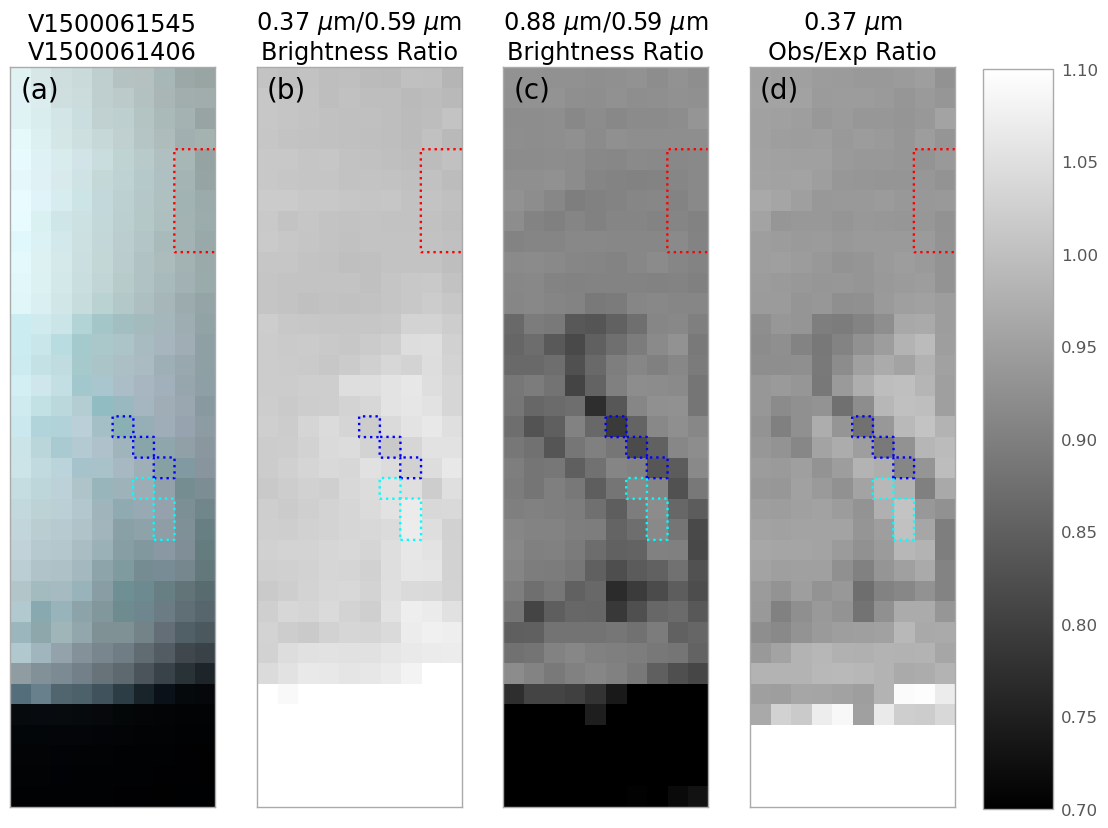

In [7]:
imx=np.zeros([3600,1000])
imy=np.zeros([3600,1000])
imz=np.zeros([3600,1000])

imx[1600:1700,700:800]=1
imx[1700:1800,600:700]=1
imx[1800:1900,500:600]=1
imy[1300:1400,700:800]=1
imy[1400:1500,700:800]=1
imy[1500:1600,600:700]=1
imz[2700:3200,800:1200]=1
xx=np.linspace(0,36,3600)-.5
xy=np.linspace(0,10,1000)-.5

specv1=(qubc[8,0:96,15]+qubc[7,0:96,16]+qubc[6,0:96,17]+qubc[5,0:96,18])/4
specv2=(qubc[8,0:96,12]+qubc[7,0:96,13]+qubc[7,0:96,14]+qubc[6,0:96,15])/4
specv3=(qubc[9,0:96,27]+qubc[9,0:96,28]+qubc[9,0:96,29]+qubc[9,0:96,30])/4
specv3y=np.mean(np.mean(qubx[10:11,0:96,16:20],axis=0),axis=1)



fig, axs = plt.subplots(1,4, figsize=(14, 12))
axs[0].imshow((imcx*1.6), origin='lower')
axs[0].grid(False)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('V1500061545\nV1500061406')


axs[1].imshow((im1c/im2c), vmin=0.7, vmax=1.1, cmap='gray', origin='lower')
axs[1].grid(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('0.37 $\mu$m/0.59 $\mu$m\nBrightness Ratio')
axs[2].imshow(im3c/im2c, vmin=0.7, vmax=1.1, cmap='gray', origin='lower')
axs[2].grid(False)
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title('0.88 $\mu$m/0.59 $\mu$m\nBrightness Ratio')
axs[3].imshow(r1, vmin=0.7, vmax=1.1, cmap='gray', origin='lower')
ax3=axs[3].imshow(r1, vmin=0.7, vmax=1.1, cmap='gray', origin='lower')
axs[3].grid(False)
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[3].set_title('0.37 $\mu$m\nObs/Exp Ratio')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.185, 0.05, 0.617])
fig.colorbar(ax3, cax=cbar_ax)

axs[3].contour(xy,xx,imx, colors='blue', linestyles='dotted',
                    levels=[.01])
axs[3].contour(xy,xx,imy, colors='cyan', linestyles='dotted',
                    levels=[.01])
axs[3].contour(xy,xx,imz, colors='red', linestyles='dotted',
                    levels=[.01])
axs[2].contour(xy,xx,imx, colors='blue', linestyles='dotted',
                    levels=[.01])
axs[2].contour(xy,xx,imy, colors='cyan', linestyles='dotted',
                    levels=[.01])
axs[2].contour(xy,xx,imz, colors='red', linestyles='dotted',
                    levels=[.01])
axs[1].contour(xy,xx,imx, colors='blue', linestyles='dotted',
                    levels=[.01])
axs[1].contour(xy,xx,imy, colors='cyan', linestyles='dotted',
                    levels=[.01])
axs[1].contour(xy,xx,imz, colors='red', linestyles='dotted',
                    levels=[.01])
axs[0].contour(xy,xx,imx, colors='blue', linestyles='dotted',
                    levels=[.01])
axs[0].contour(xy,xx,imy, colors='cyan', linestyles='dotted',
                    levels=[.01])
axs[0].contour(xy,xx,imz, colors='red', linestyles='dotted',
                    levels=[.01])

axs[0].annotate('(a)', [0,34], fontsize=20)
axs[1].annotate('(b)', [0,34], fontsize=20)
axs[2].annotate('(c)', [0,34], fontsize=20)
axs[3].annotate('(d)', [0,34], fontsize=20)
plt.savefig('encsurfdisp_060525.pdf', bbox_inches='tight')

plt.show()

/var/folders/1r/l15xqvtx5fj7vq10n8_wg3sr0000gn/T/ipykernel_72050/3256967104.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs1.set_xticklabels([' ',' ',' ',' ',' '])


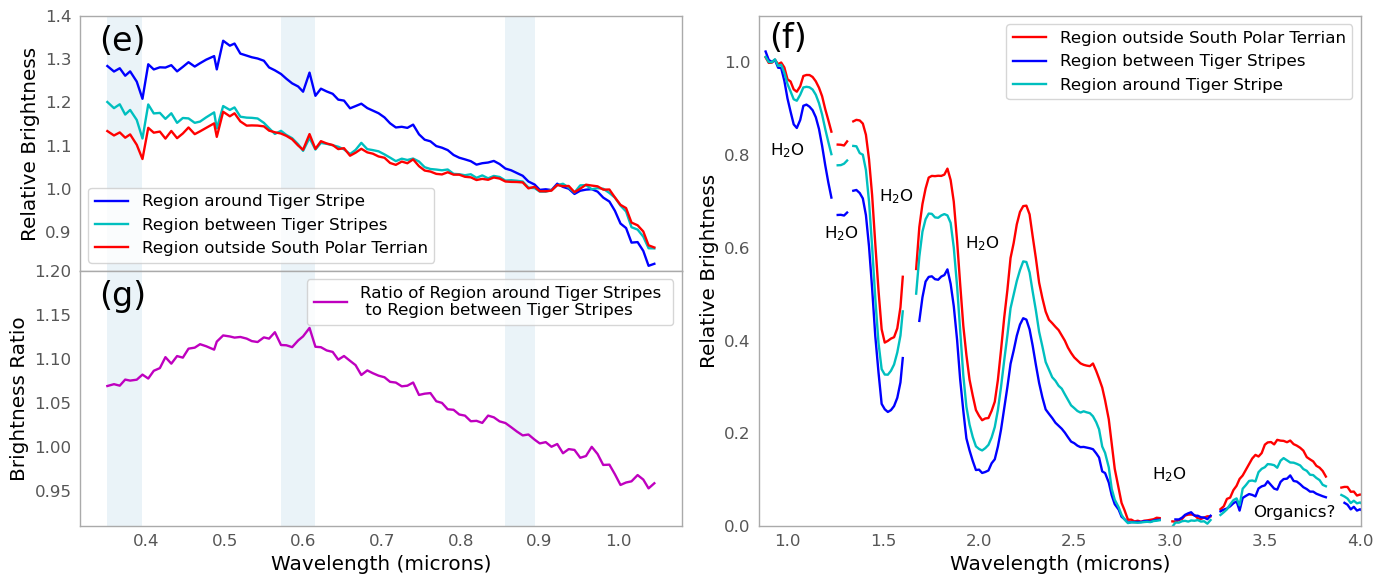

In [9]:
fig = plt.figure(figsize=[14,6])

gs = fig.add_gridspec(2,2, hspace=0)
axs1 = fig.add_subplot(gs[0, 0])
axs2 = fig.add_subplot(gs[1, 0])
axs3 = fig.add_subplot(gs[:, 1])
foonv=(wavel[0:96]>0.9) & (wavel[0:96]<0.95)
fooni=(wavel[96:352]>0.9) & (wavel[96:352]<0.95)
axs1.plot(wavel[0:96],specv1xx/np.mean(specv1xx[foonv]), 'b', label='Region around Tiger Stripe')
axs1.plot(wavel[0:96],specv2xx/np.mean(specv2xx[foonv]), 'c', label='Region between Tiger Stripes')
axs1.axvspan(np.min(wavev[foo1c]),np.max(wavev[foo1c]),alpha=0.1)
axs1.axvspan(np.min(wavev[foo2c]),np.max(wavev[foo2c]),alpha=0.1)
axs1.axvspan(np.min(wavev[foo3c]),np.max(wavev[foo3c]),alpha=0.1)
axs1.plot(wavel[0:96],specv3y/np.mean(specv3y[foonv]), 'r', label='Region outside South Polar Terrian')
axs2.axvspan(np.min(wavev[foo1c]),np.max(wavev[foo1c]),alpha=0.1)
axs2.axvspan(np.min(wavev[foo2c]),np.max(wavev[foo2c]),alpha=0.1)
axs2.axvspan(np.min(wavev[foo3c]),np.max(wavev[foo3c]),alpha=0.1)
axs2.plot(wavel[0:96],specv1xx/np.mean(specv1xx[foonv])*np.mean(specv2xx[foonv])/specv2xx, 'm', 
          label='Ratio of Region around Tiger Stripes \n to Region between Tiger Stripes')
axs3.plot(wavel[96:352],speci3y/np.mean(speci3y[fooni]), 'r', label='Region outside South Polar Terrian')
axs3.plot(wavel[96:352],speci1xx/np.mean(speci1xx[fooni]), 'b', label='Region between Tiger Stripes')
axs3.plot(wavel[96:352],speci2xx/np.mean(speci2xx[fooni]), 'c', label='Region around Tiger Stripe')
axs3.annotate('H$_2$O',[1.0,0.8], ha='center')
axs3.annotate('H$_2$O',[1.28,0.62], ha='center')
axs3.annotate('H$_2$O',[1.57,0.7], ha='center')
axs3.annotate('H$_2$O',[2.02,0.6], ha='center')
axs3.annotate('H$_2$O',[3.0,0.1], ha='center')
axs3.annotate('Organics?',[3.65,0.02], ha='center')
axs1.annotate('(e)',[0.37,1.32], ha='center', fontsize=24)
axs2.annotate('(g)',[0.37,1.16], ha='center', fontsize=24)
axs3.annotate('(f)',[1,1.03], ha='center', fontsize=24)



axs3.set_xlim([0.85,4])
axs3.set_ylim([0,1.1])
axs1.set_ylim([.81,1.4])
axs2.set_ylim([.91,1.2])
axs1.legend()
axs2.legend()
axs3.legend()
axs1.grid(False)
axs2.grid(False)
axs3.grid(False)
axs1.set_ylabel('Relative Brightness')
axs2.set_ylabel('Brightness Ratio')
axs1.set_xticklabels([' ',' ',' ',' ',' '])
axs3.set_ylabel('Relative Brightness')
axs2.set_xlabel('Wavelength (microns)')
axs3.set_xlabel('Wavelength (microns)')
#plt.savefig('encsurfspec_renorm_063025.pdf', bbox_inches='tight')
plt.savefig('encsurfspec_renorm_v2_110425.pdf', bbox_inches='tight')
fig.tight_layout()

plt.show()